## Workflows

### Components of Transformer: Understanding and Coding from Scratch

1. Input Embedding
2. Positional Encoding
3. Self-Attention
   - Multihead Attention
   - Masked Multihead Attention
4. Feed-Forward Network (Point-wise)
5. Add & Norm
6. Residual Connection

### Building the Transformer

1. Encoder
2. Decoder

### Combining Parts to Construct the Complete Transformer

## Building the Transformer in Colab

1. Setting Up the Environment
2. Implementing the Encoder
3. Implementing the Decoder
4. Assembling the Transformer
5. Testing and Validating the Transformer

## Additional Tools and Functions

1. Tokenizer
2. Loading Dataset

## Validation and Training

1. Validation Loop
2. Training Loop

## Conclusion and Next Steps


# Import Libraries

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset,DataLoader,random_split
from torch.utils.tensorboard import SummaryWriter

import math

from datasets import load_dataset
from tokenizer import Tokenizer
from tokenizer.models import WordLevel
from tokenizer.trainers import WordLevelTrainer
from tokenizer.pre_tokenizers import whitespace

from pathlib import Path
from typing import Any
from tqdm import tqdm
import warnings

# 1st Component Input Embeding

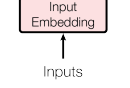

### Another ShowCase
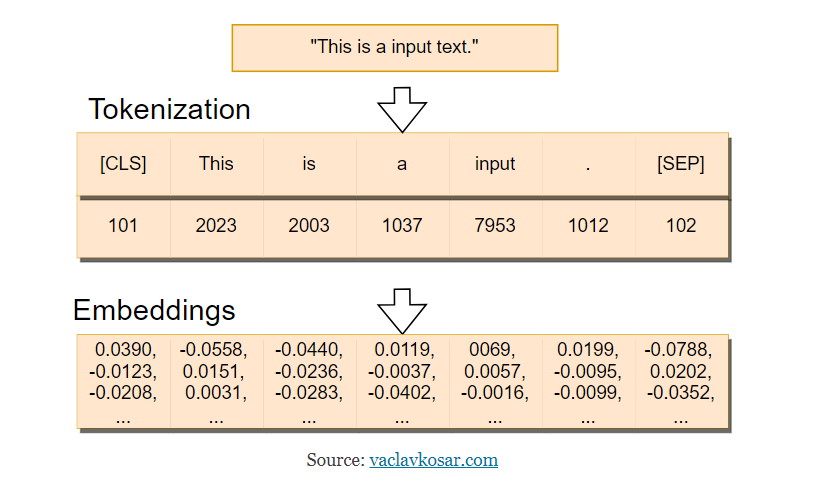

##  01. Inputs Defining

- Input Text: "The animal didn't cross the street because it was too tired"

#### Converting to Tokens...

- Tokens:
  - "The", "animal", "didn't", "cross", "the", "street", "because", "it", "was", "too", "tired"

##### Forming Vocabulary with Indices...

- Vocabulary:
  - "The": 0
  - "animal": 1
  - "didn't": 2
  - "cross": 3
  - "the": 4
  - "street": 5
  - "because": 6
  - "it": 7
  - "was": 8
  - "too": 9
  - "tired": 10
  #### Vocab Size =10

##### Now let's represent the Input Text according to vocabulary indices...

- Here it is:
  - [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

- Now Thise Numerical representation of our Input text we wiil feed to Our first embediing layer
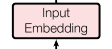

# Code for InputEmbedings
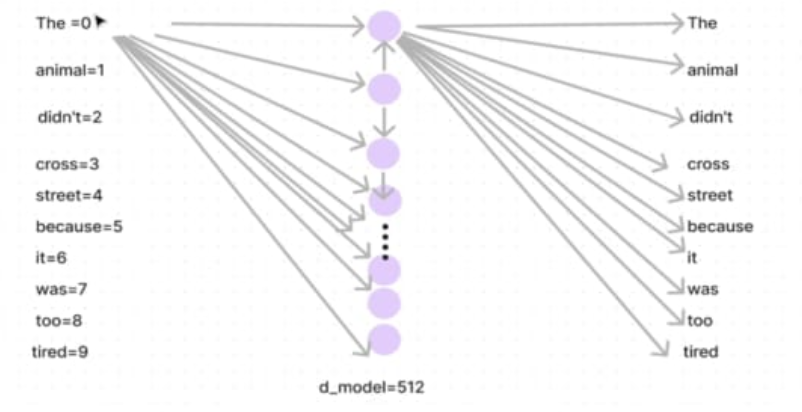

In [ ]:
class InputEmbeddings(nn.Module):
    def __init__(self, d_model: int, vocab_size: int):
        """
        Initialize the InputEmbeddings layer.

        Args:
        - d_model (int): Dimensionality of the embedding vector.
        - vocab_size (int): Size of the vocabulary.

        Note:
        - `d_model`: Represents the dimensionality of the vector when a word is passed to the embedding layer.
                    For example, if d_model=512, each word will be represented by a 512-dimensional vector.
        - `vocab_size`: Size of the vocabulary, i.e., the total number of unique words in the input.
        """
        super().__init__()
        self.d_model = d_model
        self.vocab_size = vocab_size
        self.embedding = nn.Embedding(vocab_size, d_model)

    def forward(self, x):
        """
        Forward pass of the InputEmbeddings layer.

        Args:
        - x (Tensor): Input tensor containing indices of words in the vocabulary.

        Returns:
        - embeddings (Tensor): Embedding tensor representing each token in the input sequence.
                               The shape of the tensor is [sequence_length, d_model].

        Note:
        - `x`: For example, if x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], it represents the indices of tokens in the input sequence.
        """
        return self.embedding(x) * math.sqrt(self.d_model)  # Normalizing the variance of the embedding, according to research Paper


In [ ]:
d_model=512
voab_size=10

### Our Embedding look like thise if we consider our example
-"The", "animal", "didn't", "cross", "the", "street", "because", "it", "was", "too", "tired"

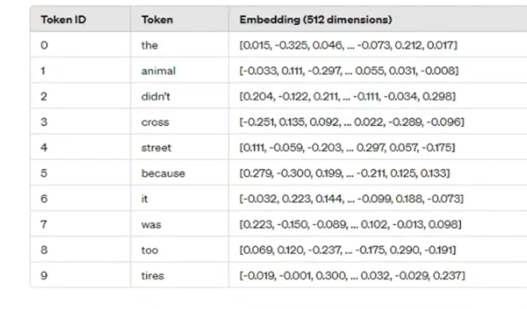

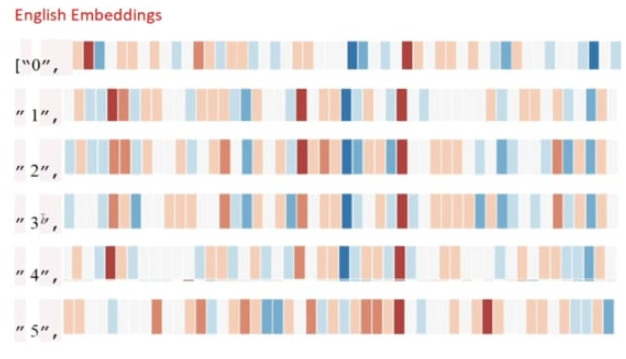

# Exploring Embedding Layers: Capturing Personality Traits in Vectors


## Embedding Personalities into Vectors
In our methodology, we assign personality traits to individuals based on percentages, creating a vector representation for each person.



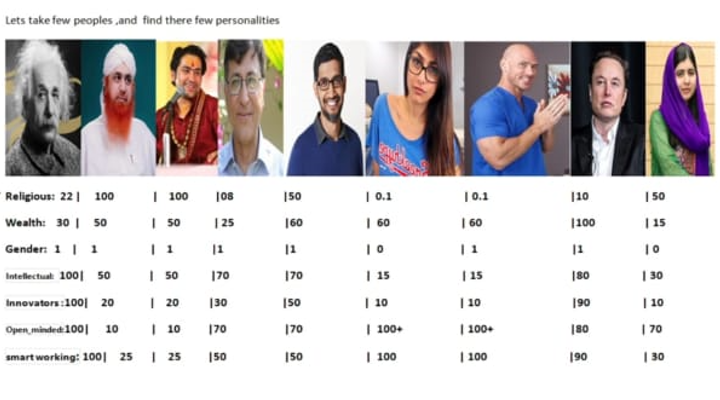


## Embedding: Representing Personalities in Vectors
- In our approach, we encapsulate each person's traits within a vector of dimensions 7, where each dimension corresponds to a specific characteristic: [religious, wealth, gender, intellectual, innovator, ...].

By examining the image provided, we can observe that individuals with similar vectors also share similar traits. This similarity is reflected in the closeness of their representations in the vector space.




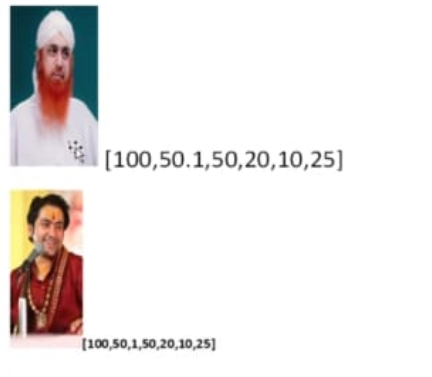

- However, in another image, we notice two individuals with vastly different vectors, indicating a significant contrast in their personalities. This discrepancy underscores the distinctiveness of each person's representation.

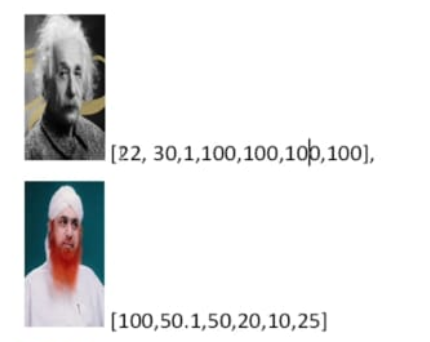

Using just 7 dimensions to describe a person allows us to easily see how they compare to others. These vectors act as a concise summary of a person's traits, similar to how Transformer research uses embeddings. While Transformers often use larger spaces, like 512 dimensions for words, our method shows that even 7 dimensions can capture important aspects of personality. It's worth noting that these seven vectors cover a broad range of traits and qualities.

# 2.Understanding Transformer Position Encoding
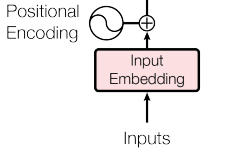
<br>
- "The animal didn't cross the street because it was too tired"<br>
max_sequence_lenght=11 <br>
embeding dim=512



In a Transformer model, Position Encoding is essential for maintaining the sequence of words in the input text. It serves the purpose of indicating the position of each word, ensuring that the model can differentiate between words based on their position in the sentence.

Let's take the example sentence: "The animal didn't cross the street because it was too tired".

Given that the maximum sequence length is 11 and the embedding dimension is 512, Position Encoding ensures that each word in the sentence retains its positional information within this sequence.

For instance, the word "The" might be represented by a vector in the embedding space, and its position in the sequence is encoded into this vector. Similarly, the word "animal" has a different vector representation with its positional encoding reflecting its position in the sequence.

By encoding positional information directly into the word embeddings, the Transformer model can effectively understand the sequential order of words and maintain this sequence throughout the processing pipeline. This prevents the positional order of words from being disturbed during the model's computations and enables it to capture the contextual relationships between words accurately.


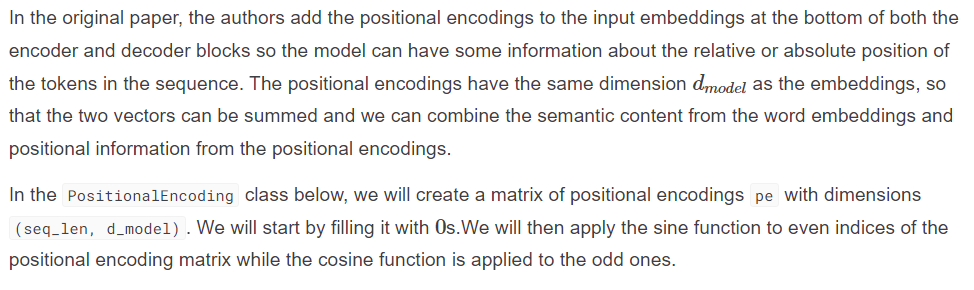

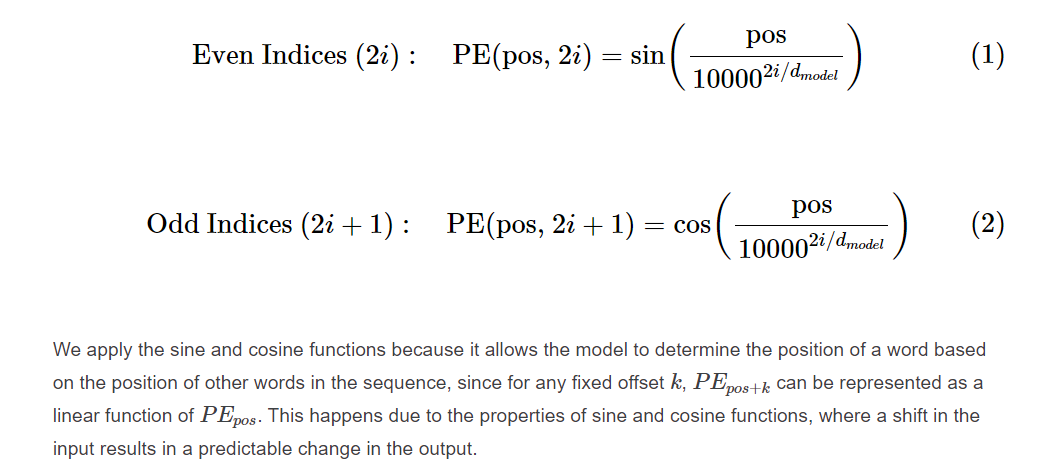

In [ ]:
import torch
import torch.nn as nn


In [ ]:
# By taking consideration of thise example  "The animal didn't cross the street because it was too tired"
d_model=6
max_sequence_length=11


In [ ]:
PE=torch.zeros(max_sequence_length,d_model)
PE

tensor([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])

In [ ]:
# postioitn of the  input Text "The animal didn't cross the street because it was too tired"
pos=torch.arange(max_sequence_length,dtype=torch.float)
pos

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [ ]:
pos=pos.reshape(max_sequence_length,1) # making it as a column vector
pos

tensor([[ 0.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.]])

- We have rearanged the formula

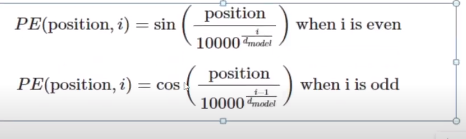

In [ ]:
even_i=torch.arange(0,d_model,2)
even_i # for even indices

tensor([0, 2, 4])

In [ ]:
# denominator
even_denominator=torch.pow(10000,even_i/d_model)
even_denominator

tensor([  1.0000,  21.5443, 464.1590])

- odd indices

In [ ]:
# odd indices
odd_i=torch.arange(1,d_model,2)
odd_i

tensor([1, 3, 5])

In [ ]:
odd_denominator=torch.pow(10000,(odd_i-1)/d_model)
odd_denominator

tensor([  1.0000,  21.5443, 464.1590])

In [ ]:
even_denominator

tensor([  1.0000,  21.5443, 464.1590])

In [ ]:
# we can see aboave the even and odd denominator are same so we use only one
denominator=even_denominator
denominator

tensor([  1.0000,  21.5443, 464.1590])

In [ ]:
# full formula code

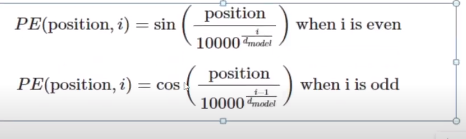

In [ ]:
pos,denominator

(tensor([[ 0.],
         [ 1.],
         [ 2.],
         [ 3.],
         [ 4.],
         [ 5.],
         [ 6.],
         [ 7.],
         [ 8.],
         [ 9.],
         [10.]]),
 tensor([  1.0000,  21.5443, 464.1590]))

In [ ]:
# even positonal encodings
even_PE=torch.sin(pos/denominator)
even_PE

tensor([[ 0.0000,  0.0000,  0.0000],
        [ 0.8415,  0.0464,  0.0022],
        [ 0.9093,  0.0927,  0.0043],
        [ 0.1411,  0.1388,  0.0065],
        [-0.7568,  0.1846,  0.0086],
        [-0.9589,  0.2300,  0.0108],
        [-0.2794,  0.2749,  0.0129],
        [ 0.6570,  0.3192,  0.0151],
        [ 0.9894,  0.3629,  0.0172],
        [ 0.4121,  0.4057,  0.0194],
        [-0.5440,  0.4477,  0.0215]])

In [ ]:
even_PE.shape  # Here 3 columns represent even positon

torch.Size([11, 3])

In [ ]:
odd_PE=torch.cos(pos/denominator)
odd_PE

tensor([[ 1.0000,  1.0000,  1.0000],
        [ 0.5403,  0.9989,  1.0000],
        [-0.4161,  0.9957,  1.0000],
        [-0.9900,  0.9903,  1.0000],
        [-0.6536,  0.9828,  1.0000],
        [ 0.2837,  0.9732,  0.9999],
        [ 0.9602,  0.9615,  0.9999],
        [ 0.7539,  0.9477,  0.9999],
        [-0.1455,  0.9318,  0.9999],
        [-0.9111,  0.9140,  0.9998],
        [-0.8391,  0.8942,  0.9998]])

In [ ]:
odd_PE.shape   # here 3   Column represent Odd Position

torch.Size([11, 3])

In [ ]:
stacked=torch.stack([even_PE,odd_PE],dim=2)

In [ ]:
stacked.shape

torch.Size([11, 3, 2])

In [ ]:
PE=torch.flatten(stacked,start_dim=1,end_dim=2)

In [ ]:
print(PE)
print(PE.shape)

tensor([[ 0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000],
        [ 0.8415,  0.5403,  0.0464,  0.9989,  0.0022,  1.0000],
        [ 0.9093, -0.4161,  0.0927,  0.9957,  0.0043,  1.0000],
        [ 0.1411, -0.9900,  0.1388,  0.9903,  0.0065,  1.0000],
        [-0.7568, -0.6536,  0.1846,  0.9828,  0.0086,  1.0000],
        [-0.9589,  0.2837,  0.2300,  0.9732,  0.0108,  0.9999],
        [-0.2794,  0.9602,  0.2749,  0.9615,  0.0129,  0.9999],
        [ 0.6570,  0.7539,  0.3192,  0.9477,  0.0151,  0.9999],
        [ 0.9894, -0.1455,  0.3629,  0.9318,  0.0172,  0.9999],
        [ 0.4121, -0.9111,  0.4057,  0.9140,  0.0194,  0.9998],
        [-0.5440, -0.8391,  0.4477,  0.8942,  0.0215,  0.9998]])
torch.Size([11, 6])


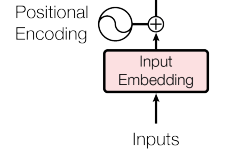

#### Now we will add above Positional Encoding to our Embedding output
<br>
for the sack of simplicity by taking consideration  of thise example  <br>
-"The animal didn't cross the street because it was too tired"

###our embedding output for above example look like thise
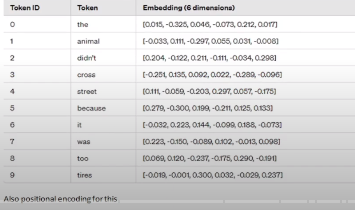

# Creating the Positional Encoding

In [ ]:
# Creating the Positional Encoding
class PositionalEncoding(nn.Module):

    def __init__(self, d_model: int, seq_len: int, dropout: float) -> None:
        super().__init__()
        self.d_model = d_model # Dimensionality of the model
        self.seq_len = seq_len # Maximum sequence length
        self.dropout = nn.Dropout(dropout) # Dropout layer to prevent overfitting

        # Creating a positional encoding matrix of shape (seq_len, d_model) filled with zeros
        pe = torch.zeros(seq_len, d_model)

        # Creating a tensor representing positions (0 to seq_len - 1)
        position = torch.arange(0, seq_len, dtype = torch.float).unsqueeze(1) # Transforming 'position' into a 2D tensor['seq_len, 1']

        # Creating the division term for the positional encoding formula
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        print(div_term)
        # Apply sine to even indices in pe
        pe[:, 0::2] = torch.sin(position * div_term)  #values chothi ho
        # Apply cosine to odd indices in pe
        pe[:, 1::2] = torch.cos(position * div_term)

        # Adding an extra dimension at the beginning of pe matrix for batch handling
        pe = pe.unsqueeze(0)

        # Registering 'pe' as buffer. Buffer is a tensor not considered as a model parameter
        self.register_buffer('pe', pe)

    def forward(self,x):
        # Addind positional encoding to the input tensor X
        x = x + (self.pe[:, :x.shape[1], :]).requires_grad_(False)
        return self.dropout(x) # Dropout for regularization

# Before moving forward you must read
## [Self Attention](https://colab.research.google.com/drive/1AFGzgt3A1S9jMBjiZF8TNhkecWCE3qAI?usp=sharing)

# MultiHead Attention

- Self-Attention:
Self-attention allows each word in a sequence to attend to other words in the same sequence. It calculates attention scores by comparing each word to every other word, capturing dependencies and relationships within the sequence.

- Self-Attention Without Masking:
In self-attention without masking, each word attends to all other words in the sequence without any restrictions. This allows the model to learn relationships between words but may also lead to leakage of information from future tokens during decoding.

- Self-Attention With Masking:
In self-attention with masking, we apply a mask to prevent tokens from attending to future tokens during decoding. This ensures that each word attends only to previous words in the sequence, preserving the autoregressive nature of the model.

- Why We Need Self-Attention:
Self-attention is essential for capturing long-range dependencies and contextual information within a sequence. It allows the model to understand relationships between words and make informed predictions based on the entire context of the sequence.

Now, let's consider the example sentence:
"The animal didn't cross the street because it was tired."

In this sentence, we want to understand which word "it" refers to. Self-attention helps us achieve this by allowing each word to attend to every other word in the sentence. This enables the model to determine the contextual meaning of "it" based on the surrounding words in the sequence.




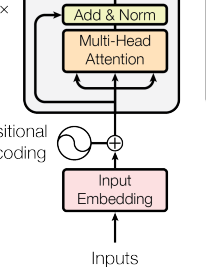

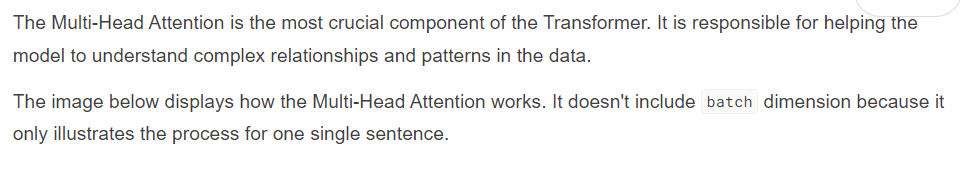

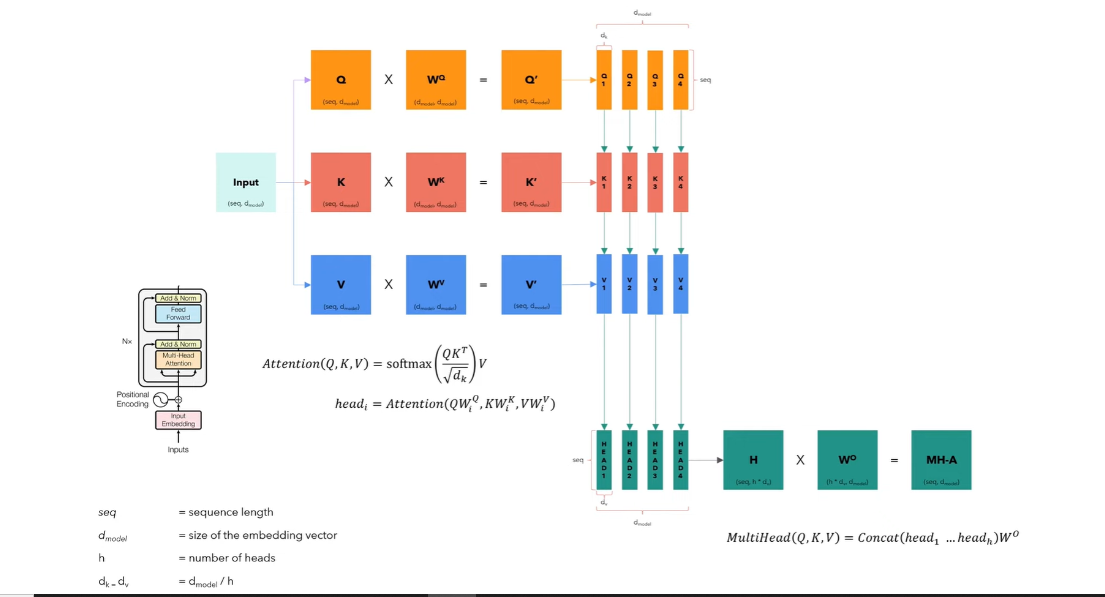

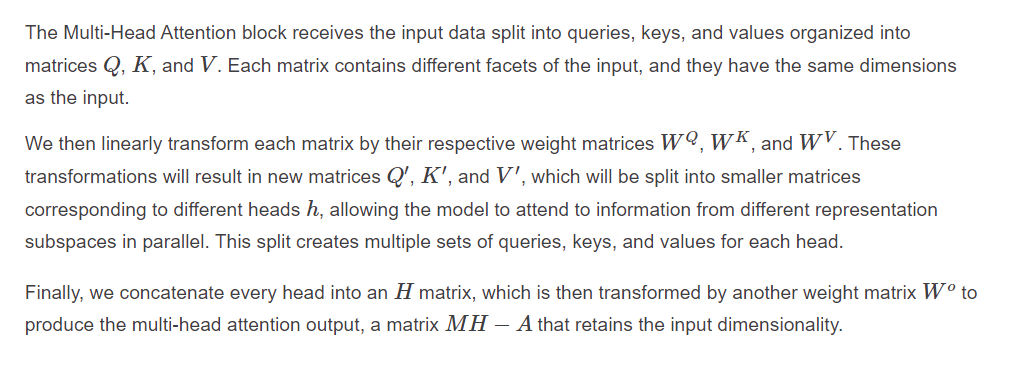


# Actual multihead attention

In [ ]:
class MultiheadAttentionBlock(nn.Module):

  def __init__(self,d_model:int,h:int,dropout:float)->None:
    super().__init__()
    self.d_model=d_model  # input dimesnion cominng from embeding layers which has 512 dimension
    self.h=h  # no of heads example =8
    assert d_model %h==0, 'd_model is noy divivsible by h'
      # d_k is the dimension of each attention head's key, query, and value vectors
    self.d_k=d_model//h   #dividing input dimesion for 8 heads each heads now 512/8=64 dimensionial input vector later we will use thise to make 3 copies of Q,K,V fro each heads

     # Defining the weight matrices
    self.w_q = nn.Linear(d_model, d_model) # W_q  (1,11,512)
    self.w_k = nn.Linear(d_model, d_model) # W_k
    self.w_v = nn.Linear(d_model, d_model) # W_v
    self.w_o = nn.Linear(d_model, d_model) # W_o

    self.dropout = nn.Dropout(dropout) # Dropout layer to avoid overfitting


  @staticmethod
  def attention(query, key, value, mask, dropout: nn.Dropout):# mask => When we want certain words to NOT interact with others, we "hide" them
        d_k = query.shape[-1] # The last dimension of query, key, and value
        attention_scores=(query @ key.transpose(-2,-1))/math.sqrt(d_k)

        # Before applying the softmax, we apply the mask to hide some interactions between words
        if mask is not None: # If a mask IS defined...
            attention_scores.masked_fill_(mask == 0, -1e9) # Replace each value where mask is equal to 0 by -1e9

        attention_scores = attention_scores.softmax(dim = -1) # Applying softmax
        if dropout is not None: # If a dropout IS defined...
            attention_scores = dropout(attention_scores) # We apply dropout to prevent overfitting

        # [1,8,11,11] @ [1,8,11,64]---> [1,8,11,64]
        return (attention_scores @ value), attention_scores # Multiply the output matrix by the V matrix, as in the formula






  def forward(self,q,k,v,mask):
      # q,k,v shape (1,11,512)  if we consider thise example ”The animal didn't cross the street because it was too tired” here assumption of 1 batch or 1 text
      query=self.w_q(q)  # (1,11,512)
      key=self.w_k(k)    # (1,11,512)
      value=self.w_v(v)   # (1,11,512)


      # Splitting results into smaller matrices for the different heads
      # Splitting embeddings (third dimension) into h parts
      query = query.view(query.shape[0], query.shape[1], self.h, self.d_k).transpose(1,2) # Transpose => bring the head to the second dimension #[1,8,11,64]
      key = key.view(key.shape[0], key.shape[1], self.h, self.d_k).transpose(1,2) # Transpose => bring the head to the second dimension #[1,8,11,64]
      value = value.view(value.shape[0], value.shape[1], self.h, self.d_k).transpose(1,2) # Transpose => bring the head to the second dimension #[1,8,11,64]




      # Obtaining the output and the attention scores
      x, self.attention_scores = MultiHeadAttentionBlock.attention(query, key, value, mask, self.dropout)  #--> [1,8,11,64]

      # Obtaining the x matrix
      #x=#[1,8,11,64] transpose to [1,11,8,64] for concatintingg all the 8 heads to convert back as same as input dimenison  #--> [1,11,512]

      x = x.transpose(1, 2).contiguous().view(x.shape[0], -1, self.h * self.d_k)  #--> [1,11,512]

      return self.w_o(x) # Multiply the x matrix by the weight matrix W_o, resulting in the MH-A matrix   #--> [1,11,512] (output d_model)







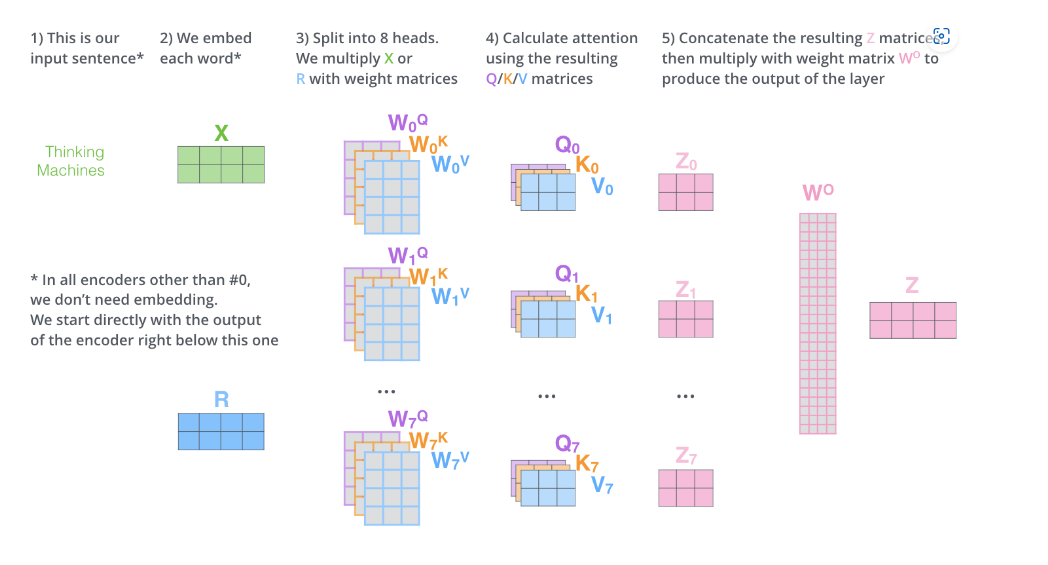

#Please read the blog first then proceed further
## [Layer Normalisation](https://https://colab.research.google.com/drive/1nXs5-0pnsirL8mxVUSxg3ATLTg6yyMo-?usp=sharing)

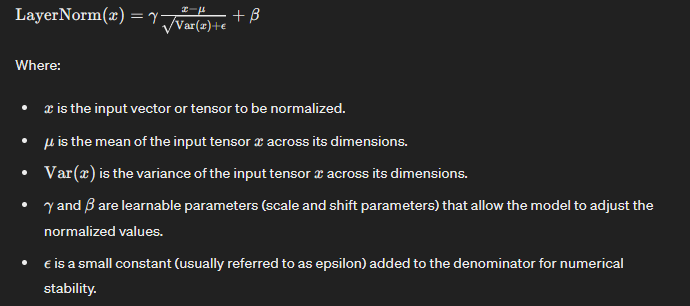

Theory


In [ ]:
# Creating Layer Normalization
class LayerNormalization(nn.Module):

    def __init__(self, eps: float = 10**-6) -> None: # We define epsilon as 0.000001 to avoid division by zero
        super().__init__()
        self.eps = eps

        # We define alpha as a trainable parameter and initialize it with ones
        self.alpha = nn.Parameter(torch.ones(1)) # One-dimensional tensor that will be used to scale the input data

        # We define bias as a trainable parameter and initialize it with zeros
        self.bias = nn.Parameter(torch.zeros(1)) # One-dimensional tenso that will be added to the input data

    def forward(self, x):
        mean = x.mean(dim = -1, keepdim = True) # Computing the mean of the input data. Keeping the number of dimensions unchanged  [1,11,512]
        std = x.std(dim = -1, keepdim = True) # Computing the standard deviation of the input data. Keeping the number of dimensions unchanged

        # Returning the normalized input
        return self.alpha * (x-mean) / (std + self.eps) + self.bias

# **Feed Foward Network**

- Input=512,---> output=512 which is our d_model
- and the inner-layer has dimensiona dff=2048

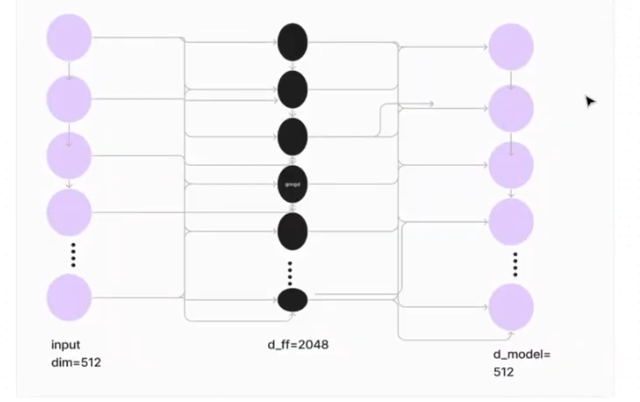

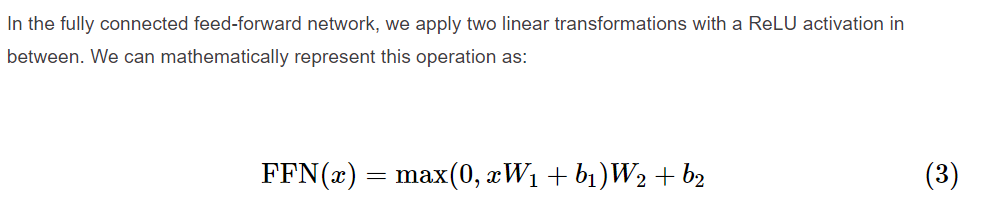

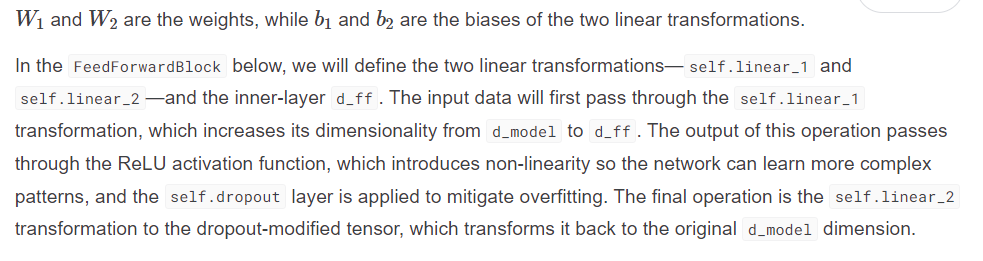

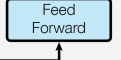

In [ ]:
input 512, output 512--> d_model

d_ff=2048

# img

In [ ]:
# Creating Feed Forward Layers
class FeedForwardBlock(nn.Module):

    def __init__(self, d_model: int, d_ff: int, dropout: float) -> None:
        super().__init__()
        # First linear transformation
        self.linear_1 = nn.Linear(d_model, d_ff) # W1 & b1
        self.dropout = nn.Dropout(dropout) # Dropout to prevent overfitting
        # Second linear transformation
        self.linear_2 = nn.Linear(d_ff, d_model) # W2 & b2

    def forward(self, x):
        # (Batch, seq_len, d_model) --> (batch, seq_len, d_ff) -->(batch, seq_len, d_model)
        # applying linear layer 1 to x ,then relu ,and then drpout and then linear_2 at last which will give back d_model( ex=512)
        return self.linear_2(self.dropout(torch.relu(self.linear_1(x))))  #<-- start reading from here

# .6 **Residual Connection**

In [ ]:
# Building Residual Connection
class ResidualConnection(nn.Module):
    def __init__(self, dropout: float) -> None:
        super().__init__()
        self.dropout = nn.Dropout(dropout) # We use a dropout layer to prevent overfitting
        self.norm = LayerNormalization() # We use a normalization layer

    def forward(self, x, sublayer):
        # We normalize the input and add it to the original input 'x'. This creates the residual connection process.
        # here in transformer we have 3 sublayer multihead, feedforward,mask multihead
        # acutal return x+self.dropout(self.norm(sublayer(x)))  #<-- read from backward side
        return x + self.dropout(sublayer(self.norm(x)))  # by harvard and other universities

# Encoder

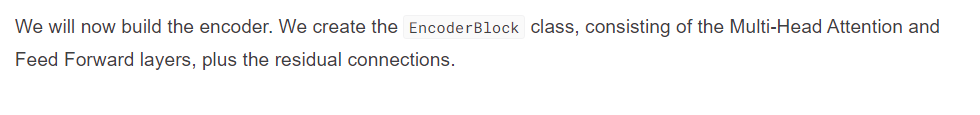

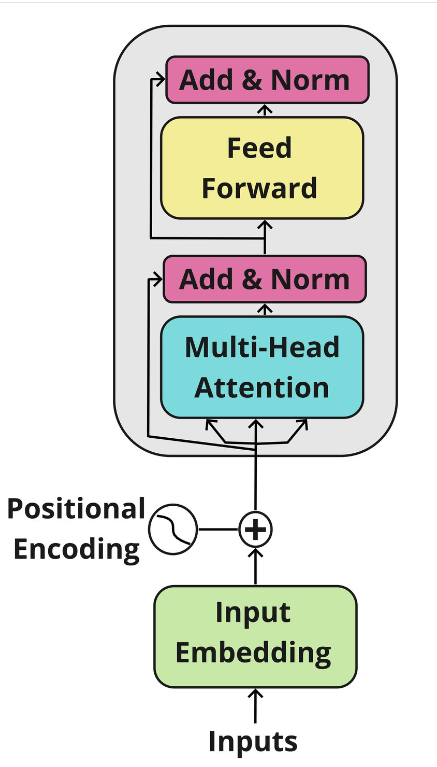

In [ ]:
# Building Encoder Block
# we can simply say one encoder block consists of two residual connection
class EncoderBlock(nn.Module):-

    # This block takes in the MultiHeadAttentionBlock and FeedForwardBlock, as well as the dropout rate for the residual connections
    def __init__(self, self_attention_block: MultiHeadAttentionBlock, feed_forward_block: FeedForwardBlock, dropout: float) -> None:
        super().__init__()
        # Storing the self-attention block and feed-forward block
        self.self_attention_block = self_attention_block
        self.feed_forward_block = feed_forward_block
        self.residual_connections = nn.ModuleList([ResidualConnection(dropout) for _ in range(2)]) # 2 Residual Connections with dropout

    # here we are applying our two residual conneciton of encoder block
    def forward(self, x, src_mask):
      # src_mask for padding
        # Applying the first residual connection with the self-attention block
        x = self.residual_connections[0](x, lambda x: self.self_attention_block(x, x, x, src_mask)) # Three 'x's corresponding to query, key, and value inputs plus source mask

        # Applying the second residual connection with the feed-forward block
        x = self.residual_connections[1](x, self.feed_forward_block)
        return x # Output tensor after applying self-attention and feed-forward layers with residual connections.

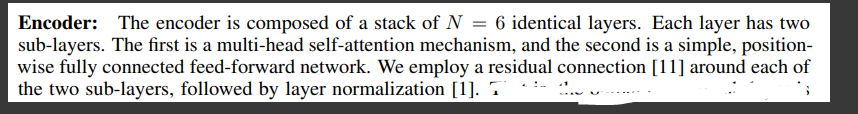

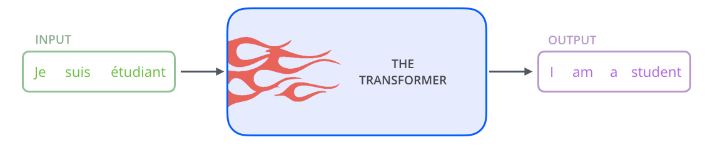

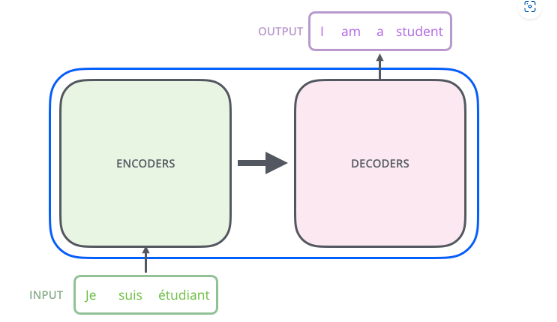

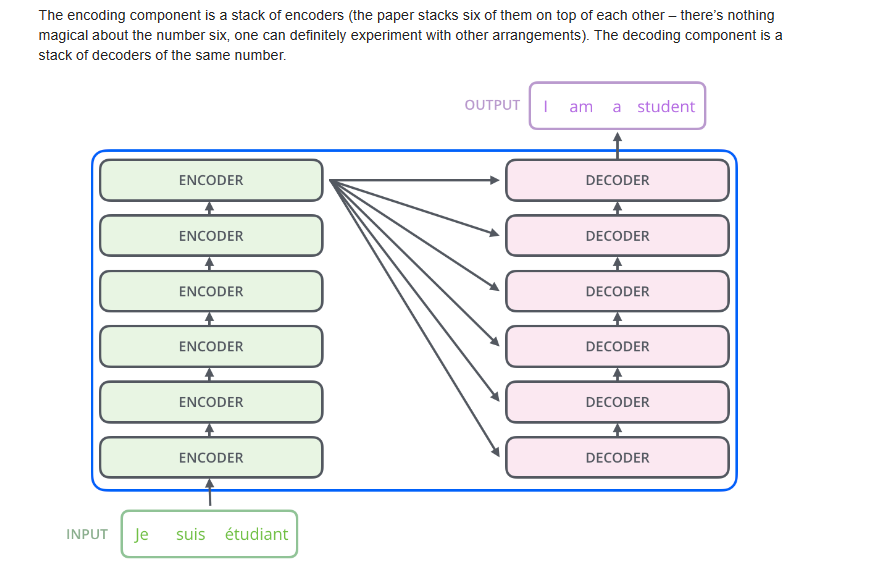

In [ ]:
# Building Encoder
# An Encoder can have several Encoder Blocks
class Encoder(nn.Module):

    # The Encoder takes in instances of 'EncoderBlock'
    def __init__(self, layers: nn.ModuleList) -> None:
        super().__init__()
        self.layers = layers # Storing the EncoderBlocks
        self.norm = LayerNormalization() # Layer for the normalization of the output of the encoder layers

    def forward(self, x, mask):
        # Iterating over each EncoderBlock stored in self.layers
        for layer in self.layers:
            x = layer(x, mask) # Applying each EncoderBlock to the input tensor 'x'
        return self.norm(x) # Normalizing output

# **Decoder**

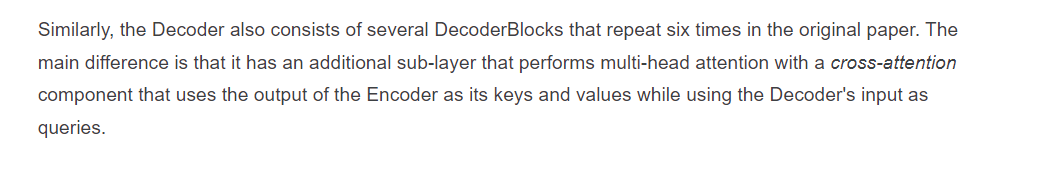

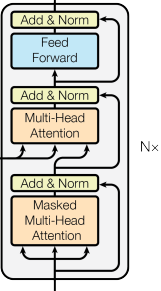 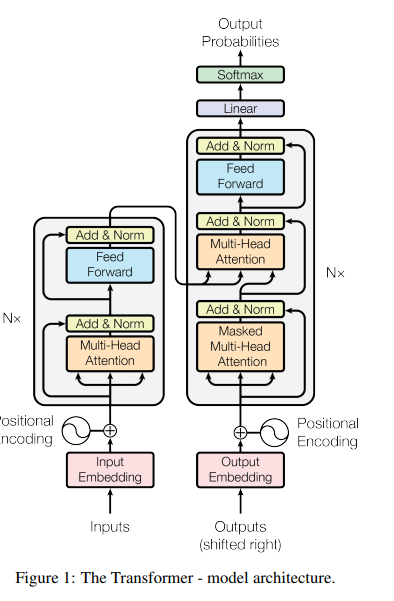

In [ ]:
if you look decoder block in transfoermer you will find first masked multihead attention with layer normalisation ,seconde is also multi head attention but we called it a croos-attention because
- its getting two input from encoder block that (KEY and VALUE )  and then QUERY from previuous compoonent, rest of them same as encoder block

In [ ]:
# Building Decoder Block
class DecoderBlock(nn.Module):

    # The DecoderBlock takes in two MultiHeadAttentionBlock. One is self-attention, while the other is cross-attention.
    # It also takes in the feed-forward block and the dropout rate
    def __init__(self,  self_attention_block: MultiHeadAttentionBlock, cross_attention_block: MultiHeadAttentionBlock, feed_forward_block: FeedForwardBlock, dropout: float) -> None:
        super().__init__()
        self.self_attention_block = self_attention_block
        self.cross_attention_block = cross_attention_block
        self.feed_forward_block = feed_forward_block
        self.residual_connections = nn.ModuleList([ResidualConnection(dropout) for _ in range(3)]) # List of three Residual Connections with dropout rate

    def forward(self, x, encoder_output, src_mask, tgt_mask):
      # tgt mask=true,srcmask=false
        # Self-Attention block with query, key, and value plus the target language mask
        x = self.residual_connections[0](x, lambda x: self.self_attention_block(x, x, x, tgt_mask))

        # The Cross-Attention block using two 'encoder_ouput's for key and value plus the source language mask. It also takes in 'x' for Decoder queries
        x = self.residual_connections[1](x, lambda x: self.cross_attention_block(x, encoder_output, encoder_output, src_mask))

        # Feed-forward block with residual connections
        x = self.residual_connections[2](x, self.feed_forward_block)
        return x

In [ ]:
# Building Decoder
# A Decoder can have several Decoder Blocks
class Decoder(nn.Module):

    # The Decoder takes in instances of 'DecoderBlock'
    def __init__(self, layers: nn.ModuleList) -> None:
        super().__init__()

        # Storing the 'DecoderBlock's
        self.layers = layers
        self.norm = LayerNormalization() # Layer to normalize the output

    def forward(self, x, encoder_output, src_mask, tgt_mask):

        # Iterating over each DecoderBlock stored in self.layers
        for layer in self.layers:
            # Applies each DecoderBlock to the input 'x' plus the encoder output and source and target masks
            x = layer(x, encoder_output, src_mask, tgt_mask)
        return self.norm(x) # Returns normalized output to the --->Project layers

## **Projection layer**

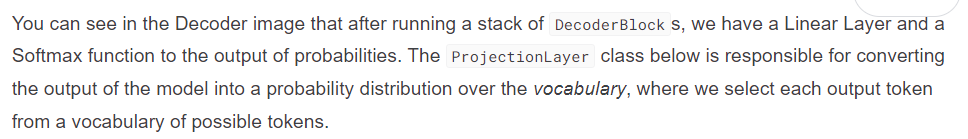

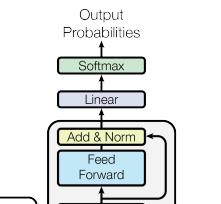

In [ ]:
# Buiding Linear Layer
class ProjectionLayer(nn.Module):
    # here we are making simple Dense layer with input dimension 512 ,which is comming from decoder block and then output layer has vocab_size number of neuron because we need probaity ,
    # that is we have given one word through decoder block and its trying to predict the probability which next word will come by using key,value from encoder and query from decoder
    def __init__(self, d_model: int, vocab_size: int) -> None: # Model dimension and the size of the targeted language vocabulary
        super().__init__()
        self.proj = nn.Linear(d_model, vocab_size) # Linear layer for projecting the feature space of 'd_model' to the output space of 'vocab_size'
    def forward(self, x):
        return torch.log_softmax(self.proj(x), dim = -1) # Applying the log Softmax function to the output

# Building the Transformer

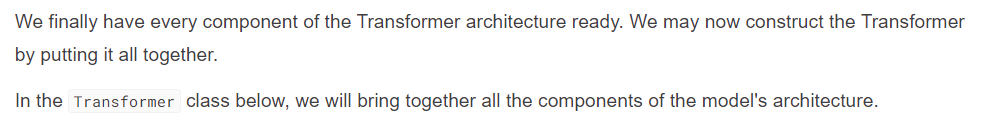

In [ ]:
# Creating the Transformer Architecture
class Transformer(nn.Module):

    # This takes in the encoder and decoder, as well the embeddings for the source and target language.
    # It also takes in the Positional Encoding for the source and target language, as well as the projection layer
    def __init__(self, encoder: Encoder, decoder: Decoder, src_embed: InputEmbeddings, tgt_embed: InputEmbeddings, src_pos: PositionalEncoding, tgt_pos: PositionalEncoding, projection_layer: ProjectionLayer) -> None:
        super().__init__()
        self.encoder = encoder
        self.decoder = decoder
        self.src_embed = src_embed
        self.tgt_embed = tgt_embed
        self.src_pos = src_pos
        self.tgt_pos = tgt_pos
        self.projection_layer = projection_layer

    # Encoder
    def encode(self, src, src_mask):
        src = self.src_embed(src) # Applying source embeddings to the input source language
        src = self.src_pos(src) # Applying source positional encoding to the source embeddings
        return self.encoder(src, src_mask) # Returning the source embeddings plus a source mask to prevent attention to certain elements

    # Decoder
    def decode(self, encoder_output, src_mask, tgt, tgt_mask):
        tgt = self.tgt_embed(tgt) # Applying target embeddings to the input target language (tgt)
        tgt = self.tgt_pos(tgt) # Applying target positional encoding to the target embeddings

        # Returning the target embeddings, the output of the encoder, and both source and target masks
        # The target mask ensures that the model won't 'see' future elements of the sequence
        return self.decoder(tgt, encoder_output, src_mask, tgt_mask)

    # Applying Projection Layer with the Softmax function to the Decoder output
    def project(self, x):
        return self.projection_layer(x)

In [ ]:
# Building & Initializing Transformer

# Definin function and its parameter, including model dimension, number of encoder and decoder stacks, heads, etc.
def build_transformer(src_vocab_size: int, tgt_vocab_size: int, src_seq_len: int, tgt_seq_len: int, d_model: int = 512, N: int = 6, h: int = 8, dropout: float = 0.1, d_ff: int = 2048) -> Transformer:

    # Creating Embedding layers
    src_embed = InputEmbeddings(d_model, src_vocab_size) # Source language (Source Vocabulary to 512-dimensional vectors)
    tgt_embed = InputEmbeddings(d_model, tgt_vocab_size) # Target language (Target Vocabulary to 512-dimensional vectors)

    # Creating Positional Encoding layers
    src_pos = PositionalEncoding(d_model, src_seq_len, dropout) # Positional encoding for the source language embeddings
    tgt_pos = PositionalEncoding(d_model, tgt_seq_len, dropout) # Positional encoding for the target language embeddings

    # Creating EncoderBlocks
    encoder_blocks = [] # Initial list of empty EncoderBlocks
    for _ in range(N): # Iterating 'N' times to create 'N' EncoderBlocks (N = 6)
        encoder_self_attention_block = MultiHeadAttentionBlock(d_model, h, dropout) # Self-Attention
        feed_forward_block = FeedForwardBlock(d_model, d_ff, dropout) # FeedForward

        # Combine layers into an EncoderBlock
        encoder_block = EncoderBlock(encoder_self_attention_block, feed_forward_block, dropout)
        encoder_blocks.append(encoder_block) # Appending EncoderBlock to the list of EncoderBlocks

    # Creating DecoderBlocks
    decoder_blocks = [] # Initial list of empty DecoderBlocks
    for _ in range(N): # Iterating 'N' times to create 'N' DecoderBlocks (N = 6)
        decoder_self_attention_block = MultiHeadAttentionBlock(d_model, h, dropout) # Self-Attention
        decoder_cross_attention_block = MultiHeadAttentionBlock(d_model, h, dropout) # Cross-Attention
        feed_forward_block = FeedForwardBlock(d_model, d_ff, dropout) # FeedForward

        # Combining layers into a DecoderBlock
        decoder_block = DecoderBlock(decoder_self_attention_block, decoder_cross_attention_block, feed_forward_block, dropout)
        decoder_blocks.append(decoder_block) # Appending DecoderBlock to the list of DecoderBlocks

    # Creating the Encoder and Decoder by using the EncoderBlocks and DecoderBlocks lists
    encoder = Encoder(nn.ModuleList(encoder_blocks))
    decoder = Decoder(nn.ModuleList(decoder_blocks))

    # Creating projection layer
    projection_layer = ProjectionLayer(d_model, tgt_vocab_size) # Map the output of Decoder to the Target Vocabulary Space

    # Creating the transformer by combining everything above
    transformer = Transformer(encoder, decoder, src_embed, tgt_embed, src_pos, tgt_pos, projection_layer)

    # Initialize the parameters
    for p in transformer.parameters():
        if p.dim() > 1:
            nn.init.xavier_uniform_(p)

    return transformer # Assembled and initialized Transformer. Ready to be trained and validated

**The model is now ready to be trained!**

# **Tokenization**

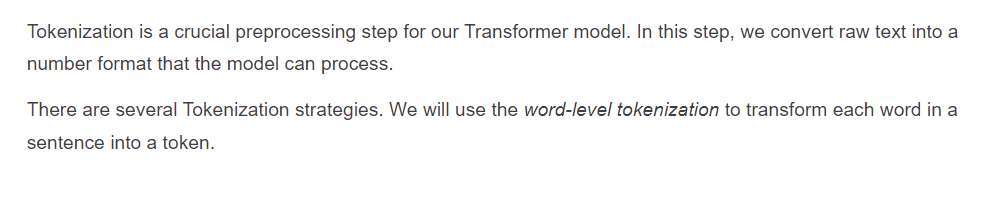

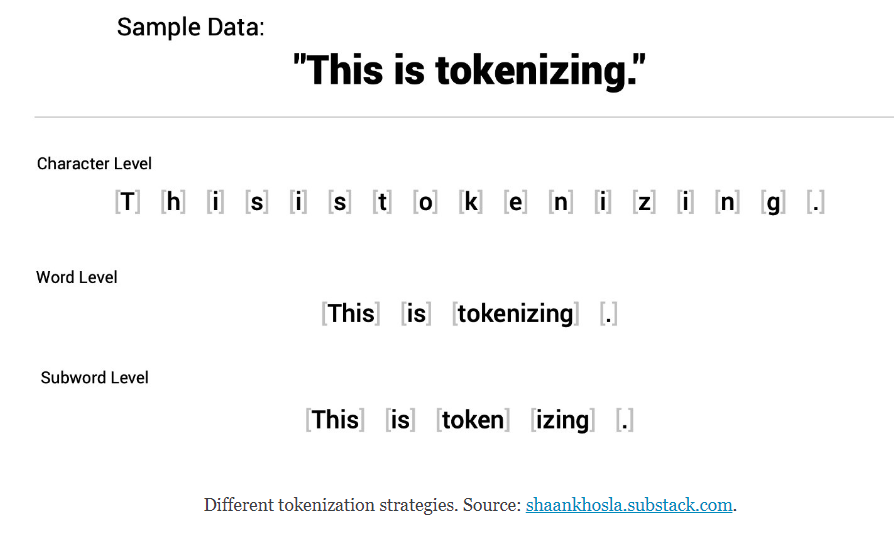

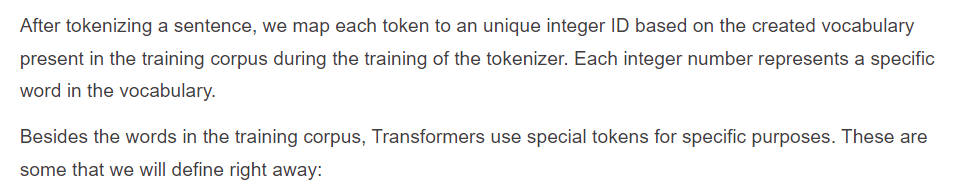

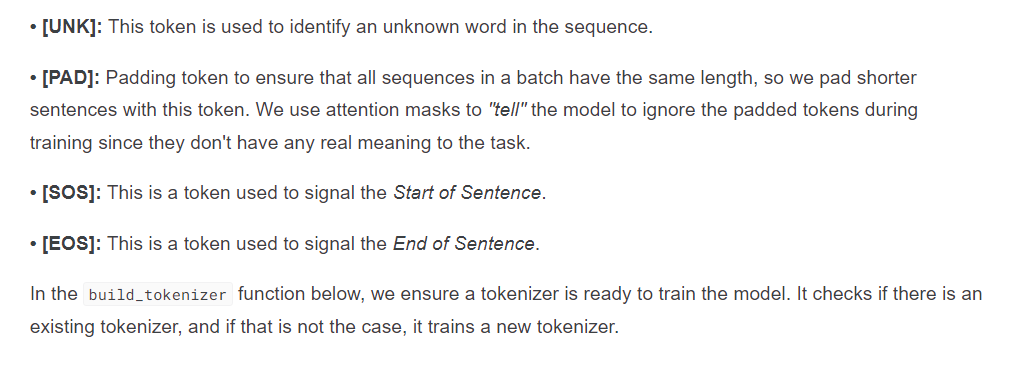

In [ ]:
# Defining Tokenizer
def build_tokenizer(config, ds, lang):

    # Crating a file path for the tokenizer
    tokenizer_path = Path(config['tokenizer_file'].format(lang))

    # Checking if Tokenizer already exists
    if not Path.exists(tokenizer_path):

        # If it doesn't exist, we create a new one
        tokenizer = Tokenizer(WordLevel(unk_token = '[UNK]')) # Initializing a new world-level tokenizer
        tokenizer.pre_tokenizer = Whitespace() # We will split the text into tokens based on whitespace

        # Creating a trainer for the new tokenizer
        trainer = WordLevelTrainer(special_tokens = ["[UNK]", "[PAD]",
                                                     "[SOS]", "[EOS]"], min_frequency = 2) # Defining Word Level strategy and special tokens

        # Training new tokenizer on sentences from the dataset and language specified
        tokenizer.train_from_iterator(get_all_sentences(ds, lang), trainer = trainer)
        tokenizer.save(str(tokenizer_path)) # Saving trained tokenizer to the file path specified at the beginning of the function
    else:
        tokenizer = Tokenizer.from_file(str(tokenizer_path)) # If the tokenizer already exist, we load it
    return tokenizer # Returns the loaded tokenizer or the trained tokenizer

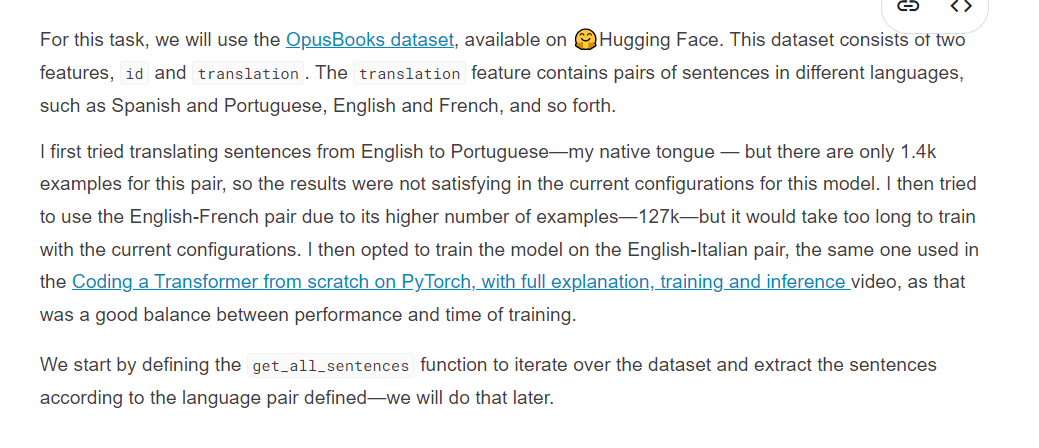

In [ ]:
# Iterating through dataset to extract the original sentence and its translation
def get_all_sentences(ds, lang):
    for pair in ds:
        yield pair['translation'][lang]

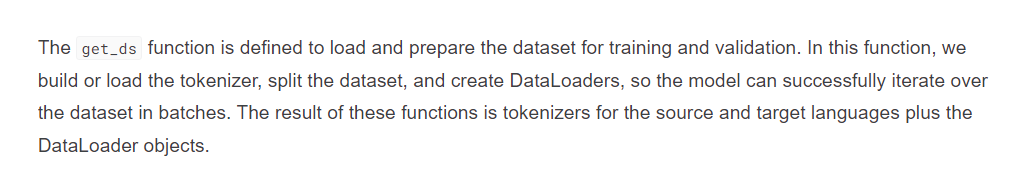

In [ ]:
def get_ds(config):

    # Loading the train portion of the OpusBooks dataset.
    # The Language pairs will be defined in the 'config' dictionary we will build later
    ds_raw = load_dataset('opus_books', f'{config["lang_src"]}-{config["lang_tgt"]}', split = 'train')

    # Building or loading tokenizer for both the source and target languages
    tokenizer_src = build_tokenizer(config, ds_raw, config['lang_src'])
    tokenizer_tgt = build_tokenizer(config, ds_raw, config['lang_tgt'])

    # Splitting the dataset for training and validation
    train_ds_size = int(0.9 * len(ds_raw)) # 90% for training
    val_ds_size = len(ds_raw) - train_ds_size # 10% for validation
    train_ds_raw, val_ds_raw = random_split(ds_raw, [train_ds_size, val_ds_size]) # Randomly splitting the dataset

    # Processing data with the BilingualDataset class, which we will define below
    train_ds = BilingualDataset(train_ds_raw, tokenizer_src, tokenizer_tgt, config['lang_src'], config['lang_tgt'], config['seq_len'])
    val_ds = BilingualDataset(val_ds_raw, tokenizer_src, tokenizer_tgt, config['lang_src'], config['lang_tgt'], config['seq_len'])

    # Iterating over the entire dataset and printing the maximum length found in the sentences of both the source and target languages
    max_len_src = 0
    max_len_tgt = 0
    for pair in ds_raw:
        src_ids = tokenizer_src.encode(pair['translation'][config['lang_src']]).ids
        tgt_ids = tokenizer_src.encode(pair['translation'][config['lang_tgt']]).ids
        max_len_src = max(max_len_src, len(src_ids))
        max_len_tgt = max(max_len_tgt, len(tgt_ids))

    print(f'Max length of source sentence: {max_len_src}')
    print(f'Max length of target sentence: {max_len_tgt}')

    # Creating dataloaders for the training and validadion sets
    # Dataloaders are used to iterate over the dataset in batches during training and validation
    train_dataloader = DataLoader(train_ds, batch_size = config['batch_size'], shuffle = True) # Batch size will be defined in the config dictionary
    val_dataloader = DataLoader(val_ds, batch_size = 1, shuffle = True)

    return train_dataloader, val_dataloader, tokenizer_src, tokenizer_tgt # Returning the DataLoader objects and tokenizers

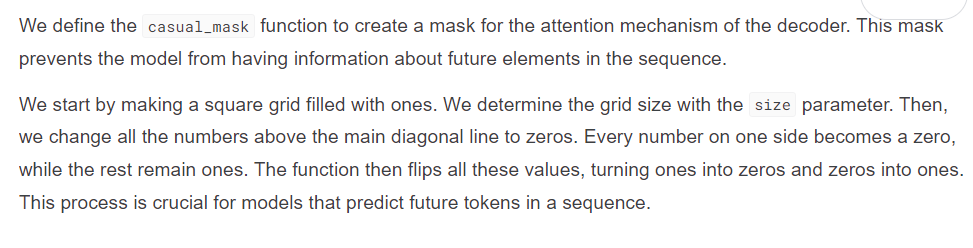

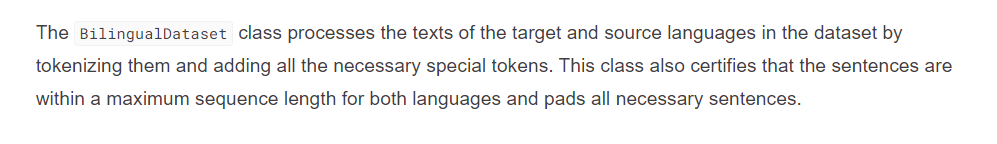

In [ ]:
class BilingualDataset(Dataset):

    # This takes in the dataset contaning sentence pairs, the tokenizers for target and source languages, and the strings of source and target languages
    # 'seq_len' defines the sequence length for both languages
    def __init__(self, ds, tokenizer_src, tokenizer_tgt, src_lang, tgt_lang, seq_len) -> None:
        super().__init__()

        self.seq_len = seq_len
        self.ds = ds
        self.tokenizer_src = tokenizer_src
        self.tokenizer_tgt = tokenizer_tgt
        self.src_lang = src_lang
        self.tgt_lang = tgt_lang

        # Defining special tokens by using the target language tokenizer
        self.sos_token = torch.tensor([tokenizer_tgt.token_to_id("[SOS]")], dtype=torch.int64)
        self.eos_token = torch.tensor([tokenizer_tgt.token_to_id("[EOS]")], dtype=torch.int64)
        self.pad_token = torch.tensor([tokenizer_tgt.token_to_id("[PAD]")], dtype=torch.int64)


    # Total number of instances in the dataset (some pairs are larger than others)
    def __len__(self):
        return len(self.ds)

    # Using the index to retrive source and target texts
    def __getitem__(self, index: Any) -> Any:
        src_target_pair = self.ds[index]
        src_text = src_target_pair['translation'][self.src_lang]
        tgt_text = src_target_pair['translation'][self.tgt_lang]

        # Tokenizing source and target texts
        enc_input_tokens = self.tokenizer_src.encode(src_text).ids
        dec_input_tokens = self.tokenizer_tgt.encode(tgt_text).ids

        # Computing how many padding tokens need to be added to the tokenized texts
        # Source tokens
        enc_num_padding_tokens = self.seq_len - len(enc_input_tokens) - 2 # Subtracting the two '[EOS]' and '[SOS]' special tokens
        # Target tokens
        dec_num_padding_tokens = self.seq_len - len(dec_input_tokens) - 1 # Subtracting the '[SOS]' special token

        # If the texts exceed the 'seq_len' allowed, it will raise an error. This means that one of the sentences in the pair is too long to be processed
        # given the current sequence length limit (this will be defined in the config dictionary below)
        if enc_num_padding_tokens < 0 or dec_num_padding_tokens < 0:
            raise ValueError('Sentence is too long')

        # Building the encoder input tensor by combining several elements
        encoder_input = torch.cat(
            [
            self.sos_token, # inserting the '[SOS]' token
            torch.tensor(enc_input_tokens, dtype = torch.int64), # Inserting the tokenized source text
            self.eos_token, # Inserting the '[EOS]' token
            torch.tensor([self.pad_token] * enc_num_padding_tokens, dtype = torch.int64) # Addind padding tokens
            ]
        )

        # Building the decoder input tensor by combining several elements
        decoder_input = torch.cat(
            [
                self.sos_token, # inserting the '[SOS]' token
                torch.tensor(dec_input_tokens, dtype = torch.int64), # Inserting the tokenized target text
                torch.tensor([self.pad_token] * dec_num_padding_tokens, dtype = torch.int64) # Addind padding tokens
            ]

        )

        # Creating a label tensor, the expected output for training the model
        label = torch.cat(
            [
                torch.tensor(dec_input_tokens, dtype = torch.int64), # Inserting the tokenized target text
                self.eos_token, # Inserting the '[EOS]' token
                torch.tensor([self.pad_token] * dec_num_padding_tokens, dtype = torch.int64) # Adding padding tokens

            ]
        )

        # Ensuring that the length of each tensor above is equal to the defined 'seq_len'
        assert encoder_input.size(0) == self.seq_len
        assert decoder_input.size(0) == self.seq_len
        assert label.size(0) == self.seq_len

        return {
            'encoder_input': encoder_input,
            'decoder_input': decoder_input,
            'encoder_mask': (encoder_input != self.pad_token).unsqueeze(0).unsqueeze(0).int(),
            'decoder_mask': (decoder_input != self.pad_token).unsqueeze(0).unsqueeze(0).int() & casual_mask(decoder_input.size(0)),
            'label': label,
            'src_text': src_text,
            'tgt_text': tgt_text
        }

# **Validation Loop**

> Add blockquote



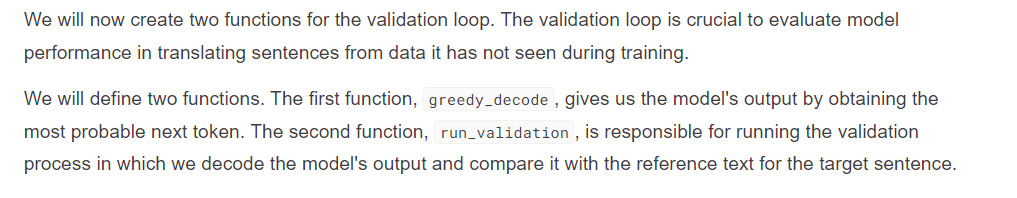

In [ ]:
# Define function to obtain the most probable next token
def greedy_decode(model, source, source_mask, tokenizer_src, tokenizer_tgt, max_len, device):
    # Retrieving the indices from the start and end of sequences of the target tokens
    sos_idx = tokenizer_tgt.token_to_id('[SOS]')
    eos_idx = tokenizer_tgt.token_to_id('[EOS]')

    # Computing the output of the encoder for the source sequence
    encoder_output = model.encode(source, source_mask)
    # Initializing the decoder input with the Start of Sentence token
    decoder_input = torch.empty(1,1).fill_(sos_idx).type_as(source).to(device)

    # Looping until the 'max_len', maximum length, is reached
    while True:
        if decoder_input.size(1) == max_len:
            break

        # Building a mask for the decoder input
        decoder_mask = casual_mask(decoder_input.size(1)).type_as(source_mask).to(device)

        # Calculating the output of the decoder
        out = model.decode(encoder_output, source_mask, decoder_input, decoder_mask)

        # Applying the projection layer to get the probabilities for the next token
        prob = model.project(out[:, -1])

        # Selecting token with the highest probability
        _, next_word = torch.max(prob, dim=1)
        decoder_input = torch.cat([decoder_input, torch.empty(1,1). type_as(source).fill_(next_word.item()).to(device)], dim=1)

        # If the next token is an End of Sentence token, we finish the loop
        if next_word == eos_idx:
            break

    return decoder_input.squeeze(0) # Sequence of tokens generated by the decoder

In [ ]:
# Defining function to evaluate the model on the validation dataset
# num_examples = 2, two examples per run
def run_validation(model, validation_ds, tokenizer_src, tokenizer_tgt, max_len, device, print_msg, global_state, writer, num_examples=2):
    model.eval() # Setting model to evaluation mode
    count = 0 # Initializing counter to keep track of how many examples have been processed

    console_width = 80 # Fixed witdh for printed messages

    # Creating evaluation loop
    with torch.no_grad(): # Ensuring that no gradients are computed during this process
        for batch in validation_ds:
            count += 1
            encoder_input = batch['encoder_input'].to(device)
            encoder_mask = batch['encoder_mask'].to(device)

            # Ensuring that the batch_size of the validation set is 1
            assert encoder_input.size(0) ==  1, 'Batch size must be 1 for validation.'

            # Applying the 'greedy_decode' function to get the model's output for the source text of the input batch
            model_out = greedy_decode(model, encoder_input, encoder_mask, tokenizer_src, tokenizer_tgt, max_len, device)

            # Retrieving source and target texts from the batch
            source_text = batch['src_text'][0]
            target_text = batch['tgt_text'][0] # True translation
            model_out_text = tokenizer_tgt.decode(model_out.detach().cpu().numpy()) # Decoded, human-readable model output

            # Printing results
            print_msg('-'*console_width)
            print_msg(f'SOURCE: {source_text}')
            print_msg(f'TARGET: {target_text}')
            print_msg(f'PREDICTED: {model_out_text}')

            # After two examples, we break the loop
            if count == num_examples:
                break

# **Training Loop**

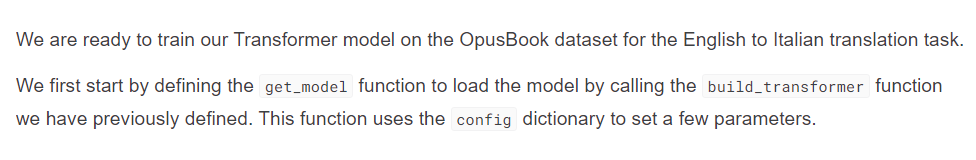

In [ ]:
# We pass as parameters the config dictionary, the length of the vocabylary of the source language and the target language
def get_model(config, vocab_src_len, vocab_tgt_len):

    # Loading model using the 'build_transformer' function.
    # We will use the lengths of the source language and target language vocabularies, the 'seq_len', and the dimensionality of the embeddings
    model = build_transformer(vocab_src_len, vocab_tgt_len, config['seq_len'], config['seq_len'], config['d_model'])
    return model

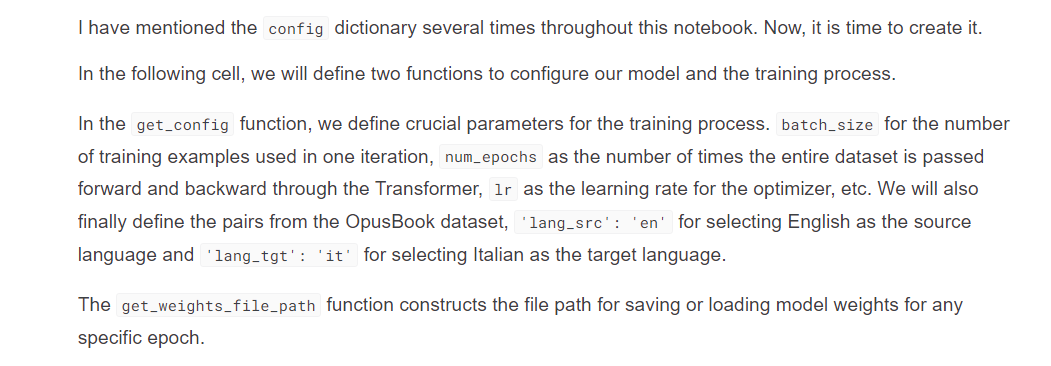

In [ ]:
# Define settings for building and training the transformer model
def get_config():
    return{
        'batch_size': 8,
        'num_epochs': 20,
        'lr': 10**-4,
        'seq_len': 350,
        'd_model': 512, # Dimensions of the embeddings in the Transformer. 512 like in the "Attention Is All You Need" paper.
        'lang_src': 'en',
        'lang_tgt': 'it',
        'model_folder': 'weights',
        'model_basename': 'tmodel_',
        'preload': None,
        'tokenizer_file': 'tokenizer_{0}.json',
        'experiment_name': 'runs/tmodel'
    }


# Function to construct the path for saving and retrieving model weights
def get_weights_file_path(config, epoch: str):
    model_folder = config['model_folder'] # Extracting model folder from the config
    model_basename = config['model_basename'] # Extracting the base name for model files
    model_filename = f"{model_basename}{epoch}.pt" # Building filename
    return str(Path('.')/ model_folder/ model_filename) # Combining current directory, the model folder, and the model filename

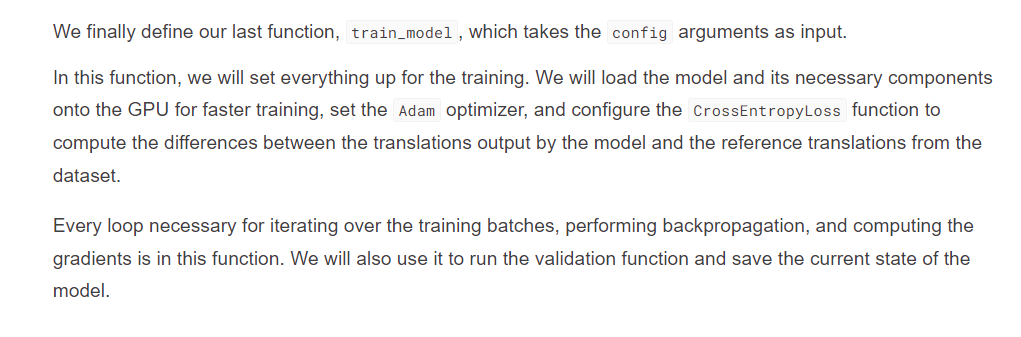

In [ ]:
def train_model(config):
    # Setting up device to run on GPU to train faster
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device {device}")

    # Creating model directory to store weights
    Path(config['model_folder']).mkdir(parents=True, exist_ok=True)

    # Retrieving dataloaders and tokenizers for source and target languages using the 'get_ds' function
    train_dataloader, val_dataloader, tokenizer_src, tokenizer_tgt = get_ds(config)

    # Initializing model on the GPU using the 'get_model' function
    model = get_model(config,tokenizer_src.get_vocab_size(), tokenizer_tgt.get_vocab_size()).to(device)

    # Tensorboard
    writer = SummaryWriter(config['experiment_name'])

    # Setting up the Adam optimizer with the specified learning rate from the '
    # config' dictionary plus an epsilon value
    optimizer = torch.optim.Adam(model.parameters(), lr=config['lr'], eps = 1e-9)

    # Initializing epoch and global step variables
    initial_epoch = 0
    global_step = 0

    # Checking if there is a pre-trained model to load
    # If true, loads it
    if config['preload']:
        model_filename = get_weights_file_path(config, config['preload'])
        print(f'Preloading model {model_filename}')
        state = torch.load(model_filename) # Loading model

        # Sets epoch to the saved in the state plus one, to resume from where it stopped
        initial_epoch = state['epoch'] + 1
        # Loading the optimizer state from the saved model
        optimizer.load_state_dict(state['optimizer_state_dict'])
        # Loading the global step state from the saved model
        global_step = state['global_step']

    # Initializing CrossEntropyLoss function for training
    # We ignore padding tokens when computing loss, as they are not relevant for the learning process
    # We also apply label_smoothing to prevent overfitting
    loss_fn = nn.CrossEntropyLoss(ignore_index = tokenizer_src.token_to_id('[PAD]'), label_smoothing = 0.1).to(device)

    # Initializing training loop

    # Iterating over each epoch from the 'initial_epoch' variable up to
    # the number of epochs informed in the config
    for epoch in range(initial_epoch, config['num_epochs']):

        # Initializing an iterator over the training dataloader
        # We also use tqdm to display a progress bar
        batch_iterator = tqdm(train_dataloader, desc = f'Processing epoch {epoch:02d}')

        # For each batch...
        for batch in batch_iterator:
            model.train() # Train the model

            # Loading input data and masks onto the GPU
            encoder_input = batch['encoder_input'].to(device)
            decoder_input = batch['decoder_input'].to(device)
            encoder_mask = batch['encoder_mask'].to(device)
            decoder_mask = batch['decoder_mask'].to(device)

            # Running tensors through the Transformer
            encoder_output = model.encode(encoder_input, encoder_mask)
            decoder_output = model.decode(encoder_output, encoder_mask, decoder_input, decoder_mask)
            proj_output = model.project(decoder_output)

            # Loading the target labels onto the GPU
            label = batch['label'].to(device)

            # Computing loss between model's output and true labels
            loss = loss_fn(proj_output.view(-1, tokenizer_tgt.get_vocab_size()), label.view(-1))

            # Updating progress bar
            batch_iterator.set_postfix({f"loss": f"{loss.item():6.3f}"})

            writer.add_scalar('train loss', loss.item(), global_step)
            writer.flush()

            # Performing backpropagation
            loss.backward()

            # Updating parameters based on the gradients
            optimizer.step()

            # Clearing the gradients to prepare for the next batch
            optimizer.zero_grad()

            global_step += 1 # Updating global step count

        # We run the 'run_validation' function at the end of each epoch
        # to evaluate model performance
        run_validation(model, val_dataloader, tokenizer_src, tokenizer_tgt, config['seq_len'], device, lambda msg: batch_iterator.write(msg), global_step, writer)

        # Saving model
        model_filename = get_weights_file_path(config, f'{epoch:02d}')
        # Writting current model state to the 'model_filename'
        torch.save({
            'epoch': epoch, # Current epoch
            'model_state_dict': model.state_dict(),# Current model state
            'optimizer_state_dict': optimizer.state_dict(), # Current optimizer state
            'global_step': global_step # Current global step
        }, model_filename)

In [ ]:
if __name__ == '__main__':
    warnings.filterwarnings('ignore') # Filtering warnings
    config = get_config() # Retrieving config settings
    train_model(config) # Training model with the config arguments